### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
!pip install -U tensorflow --quiet

#### Collect Fashion mnist data from tf.keras.datasets 

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
tf.__version__

'2.0.0'

#### Change train and test labels into one-hot vectors

In [0]:
(x_train, trainY),(x_test, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [15]:
print("Number of samples in Training are x_train and y_train ",(x_train.shape,trainY.shape))

Number of samples in Training are x_train and y_train  ((60000, 28, 28), (60000,))


In [16]:
print("Number of samples in Test are x_test and y_test",(x_test.shape,testY.shape))

Number of samples in Test are x_test and y_test ((10000, 28, 28), (10000,))


In [17]:
x_train.dtype, x_test.dtype

(dtype('uint8'), dtype('uint8'))

In [0]:
trainX = x_train.astype('float32')
testX = x_test.astype('float32')

In [19]:
trainX.dtype, testX.dtype

(dtype('float32'), dtype('float32'))

In [20]:
set(trainY)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [21]:
pd.value_counts(trainY)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [22]:
pd.value_counts(testY)

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [23]:
trainX[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,   0.,   0.,
          1.,   3.,   4.,   0.,   0.,   3.],
       [  0.,   0.,   0.,   0.,   0

In [0]:
trainX = trainX / 255

In [25]:
trainX[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
testX = testX / 255

### We have total of 10 classes in target variables

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [28]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [29]:
np.argmax(trainY[0])

9

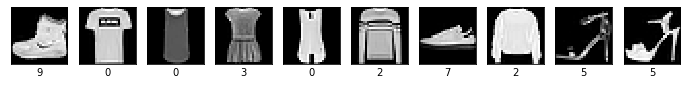

In [30]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i],cmap='gray')
  plt.xlabel(np.argmax(trainY[i]))
plt.show()

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
#Clear out model from current memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
# Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100,  activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, kernel_initializer='he_normal', 
                                activation='softmax'))
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [0]:
#Modelcheckpoint callback
ckpt = tf.keras.callbacks.ModelCheckpoint('mnist_v1.hdf5', save_best_only=True,
                                          monitor='val_loss', mode='min')

In [37]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32, callbacks=[ckpt,tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 254us/sample - loss: 0.5566 - accuracy: 0.8024 - val_loss: 0.3878 - val_accuracy: 0.8550
Epoch 2/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.4295 - accuracy: 0.8454 - val_loss: 0.3733 - val_accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.3919 - accuracy: 0.8570 - val_loss: 0.3700 - val_accuracy: 0.8655
Epoch 4/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.3737 - accuracy: 0.8637 - val_loss: 0.3598 - val_accuracy: 0.8671
Epoch 5/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.3569 - accuracy: 0.8687 - val_loss: 0.3358 - val_accuracy: 0.8794
Epoch 6/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.3374 - accuracy: 0.8747 - val_loss: 0.3291 - val_accuracy: 0.8800
Epoch 7/10
60000/60000 [====================

In [47]:
y_pred = model.predict(testX)
print(y_pred)

[[1.1615418e-06 1.0253641e-06 1.7382665e-06 ... 1.0170623e-01
  2.9786319e-05 8.7610346e-01]
 [8.9308203e-05 3.5240062e-09 9.9870336e-01 ... 7.1629977e-08
  9.9528403e-09 5.6840744e-08]
 [1.5153137e-06 9.9999607e-01 1.6575723e-07 ... 7.7957178e-09
  2.5276262e-07 5.2019207e-09]
 ...
 [1.4396167e-03 4.4202224e-07 3.3199985e-04 ... 1.1025061e-05
  9.9482441e-01 3.1092497e-07]
 [1.7323366e-06 9.9984884e-01 2.2473982e-07 ... 1.6708621e-07
  6.4237577e-07 4.7100551e-07]
 [5.6212690e-07 5.7720405e-07 6.5057570e-06 ... 3.6024649e-02
  6.8448817e-06 5.0523122e-05]]


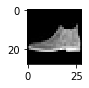

In [55]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(testX[0],cmap='gray')

In [52]:
np.argmax(testY[0])

9

In [53]:
np.argmax(y_pred[0])

9